```
 ██████╗██╗   ██╗██████╗ ███████╗██████╗      ██████╗ ██╗   ██╗ █████╗ ██████╗ ██████╗ ██╗ █████╗ ███╗   ██╗███████╗
██╔════╝╚██╗ ██╔╝██╔══██╗██╔════╝██╔══██╗    ██╔════╝ ██║   ██║██╔══██╗██╔══██╗██╔══██╗██║██╔══██╗████╗  ██║██╔════╝
██║      ╚████╔╝ ██████╔╝█████╗  ██████╔╝    ██║  ███╗██║   ██║███████║██████╔╝██║  ██║██║███████║██╔██╗ ██║███████╗
██║       ╚██╔╝  ██╔══██╗██╔══╝  ██╔══██╗    ██║   ██║██║   ██║██╔══██║██╔══██╗██║  ██║██║██╔══██║██║╚██╗██║╚════██║
╚██████╗   ██║   ██████╔╝███████╗██║  ██║    ╚██████╔╝╚██████╔╝██║  ██║██║  ██║██████╔╝██║██║  ██║██║ ╚████║███████║
 ╚═════╝   ╚═╝   ╚═════╝ ╚══════╝╚═╝  ╚═╝     ╚═════╝  ╚═════╝ ╚═╝  ╚═╝╚═╝  ╚═╝╚═════╝ ╚═╝╚═╝  ╚═╝╚═╝  ╚═══╝╚══════╝
```
Phishing is the practice of sending fraudulent communications that appear to come from a legitimate and reputable source, usually through email and text messaging. The attacker's goal is to steal money, gain access to sensitive data and login information, or to install malware on the victim's device.

Source: [Cisco](https://www.cisco.com/c/en/us/products/security/email-security/what-is-phishing.html)

In this project, we aim to build a robust Machine Learning framework to detect safe links to prevent phishing of users of their data. For this, we have made use of **Logistic regression** as it is much suited for our use case.

For the success of our project, we will be following the 5 main stages of AI project Cycle:

1.   Problem Scoping.
2.   Data Acquisition.
3.   Data Exploration.
4.   Modeling.
5.   Evaluation.

This notebook will be focussing on the stages 2-5 as problem scoping has been done in stage 1 of the hackathon.

**NOTE: The code snippets include comments for line(s) of code explaining what the line(s) do(es). The text above each snippet only provides a low level view of what the code snippet does.**






# Step 1. Import Libraries

These libraries help us in modelling and other aspects of making the model.

In [1]:
# Import essential libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting and data visualization
import seaborn as sns  # Statistical data visualization

#Import library for balancing data
from sklearn.utils import resample

# Import scikit-learn metrics for model evaluation
from sklearn.metrics import classification_report  # Detailed classification metrics
from sklearn.metrics import confusion_matrix  # Confusion matrix for model performance evaluation
from sklearn.metrics import accuracy_score  # Accuracy metric for model performance evaluation

# Import natural language processing tools
from nltk.tokenize import RegexpTokenizer  # Tokenizes text using regular expressions
from nltk.stem.snowball import SnowballStemmer  # Provides stemming for multiple languages

# Import scikit-learn tools for feature extraction and pipelines
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.pipeline import make_pipeline  # Simplifies pipeline creation

# Import libraries for plotting visual graphics
from wordcloud import WordCloud  # Generates word clouds for text analysis

# Import library for saving and loading models or data
import pickle

# Import libraries for networking
import requests
from io import BytesIO


# Step 2: Data

This section will deal with aquiring, exploring and manipulating data


## Step 2.1: Acquisition

The data was obtained from [Kaggle](https://www.kaggle.com/), a dataset named ['Phishing Site URLs'](https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls)

Kaggle is a good and reliable source of data, therefore, we have chosen a dataset from Kaggle.

## Step 2.2: Exploration

Data exploration is an important to understand the types of data we are working with.

We first load the **CSV** (Comma Seperated Values) file and assign the [**DataFrame**](https://geeksforgeeks.org/python-pandas-dataframe//) the **variable 'df'**. To ensure that the CSV is actually loaded, we can display the first 5 rows of 'df'

In [ ]:
# Loading the dataset
df = pd.read_csv("https://github.com/KrishKumarRajani/LinkGuardians/raw/refs/heads/main/data/db.csv", encoding='latin1')

# Display the first 5 rows of the DataFrame
df.head()

,url,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad




---


After verifiying that the dataset is loaded, let us see the different columns and rows in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     549346 non-null  object
 1   label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


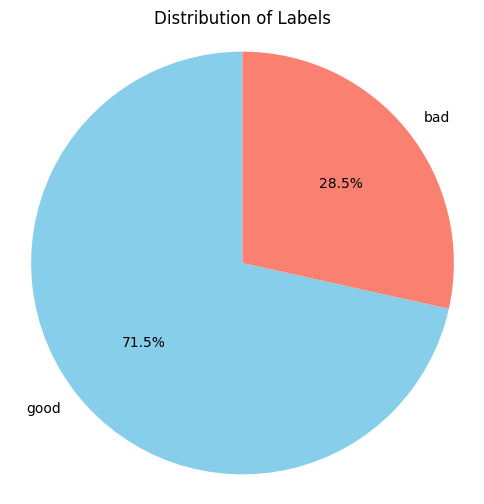

In [ ]:
# Display column info and data types
df.info()

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio to ensure the pie chart is a circle
plt.show()

Here, we can see the CSV file has two columns, one for URL's and one for labels. From the dataset uploader, [Tarun Tiwari](https://www.kaggle.com/taruntiwarihp), we also get the following information:

> Data is containg 5,49,346 entries.
There are two columns.
Label column is prediction col which has 2 categories
A. Good - which means the URLs is not containing malicious stuff and this site is not a Phishing Site.
B. Bad - which means the URLs contains malicious stuff and this site is a Phishing Site.
There is no missing value in the dataset.

Just to confirm, we can see that pandas (library) shows that there are '549346 non-null' in both columns, meaning that there are **549346** values that are not **ZERO** or **NULL**


## Step 2.3: Manipulation


Another glaring detail is also noticed from the graph plotted. There are more URL's with the label 'good' than ' bad'. Hence, the data given by the uploader is '[**unbalanced**](https://www.turintech.ai/what-is-imbalanced-data-and-how-to-handle-it/)'. There are two challenges in modeling imbalanced data.
1.  Firstly, training with imbalanced data may lead to obtaining poor performance of the trained model in the minority category
2.  Secondly, training the models on imbalanced datasets can markedly affect the validation/test set performance.
**Source:** [ScienceDirect](https://www.sciencedirect.com/topics/computer-science/imbalanced-data)


To overcome this, we have to undersample the data. [**Undersampling**](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#Undersampling_techniques_for_classification_problems) is the process of omitting values of the majority class (in this case, 'bad' links) to make the majority class equal to the minority class. [Oversampling](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#Oversampling_techniques_for_classification_problems) is also an option, which is the process of adding synthetic values to the minority class to to make the minority class equal to the majority class. However, this process is very resource intensive, time consuming, and can produce incorrect values. Since our dataset is already very large, undersampling is more than enough.

label
bad     156422
good    156422
Name: count, dtype: int64


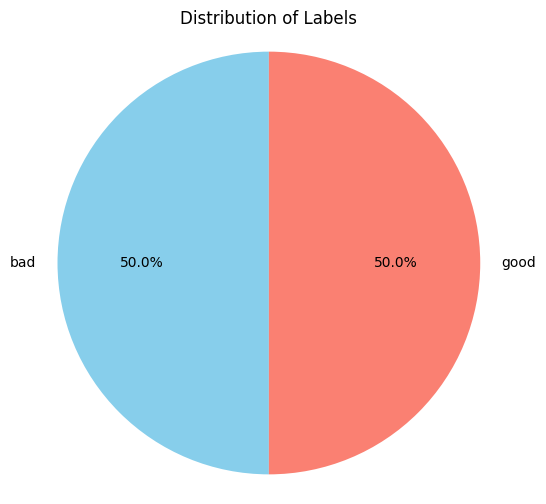

In [ ]:
# Separate the minority and majority classes
minority_class = df[df['label'] == 'bad']
majority_class = df[df['label'] == 'good']

# Downsample the majority class to match the minority class size
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the downsampled majority class with the minority class to get a balanced dataset
b_df = pd.concat([minority_class, majority_downsampled])

# Check the distribution of the classes after downsampling
print(b_df['label'].value_counts())

# Count the occurrences of each label
label_counts = b_df['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio to ensure the pie chart is a circle
plt.show()

Now there are equal number of 'good' and 'bad' links

## Step 2.4: Visualisation

Now, let us go into visualising the trends or patterns in the data with the help of visual aids like [term clouds](https://en.wikipedia.org/wiki/Tag_cloud) and graphs. These will become useful in the modelling stage.

First, let us see the most common words that are seen in bad and good URL's.

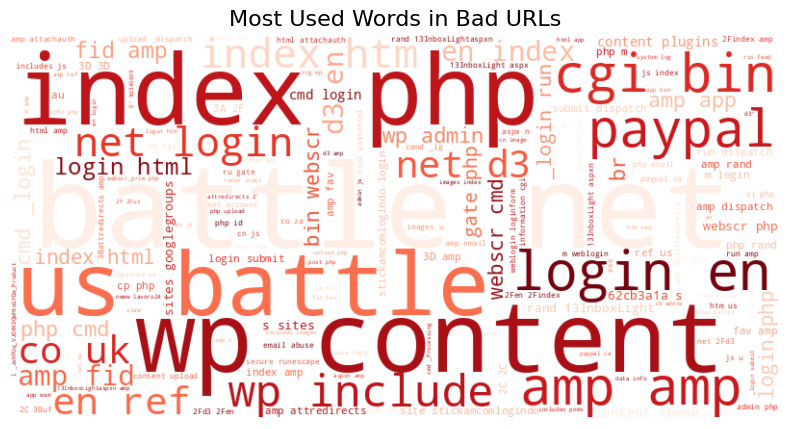

In [ ]:
# Filter the DataFrame for bad URLs
bad_urls = b_df[b_df['label'] == 'bad']['url']

# Join all the bad URLs into a single string for processing
bad_urls_text = ' '.join(bad_urls)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(bad_urls_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Used Words in Bad URLs", fontsize=16)
plt.show()

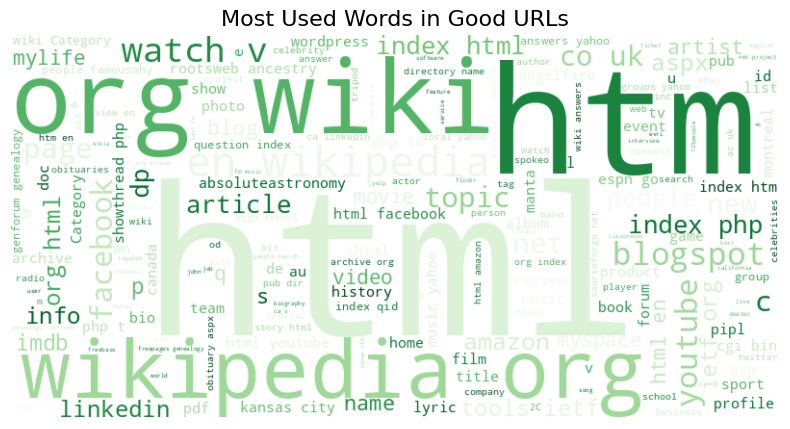

In [ ]:
# Filter the DataFrame for good URLs
good_urls = b_df[b_df['label'] == 'good']['url']

# Join all the good URLs into a single string for processing
good_urls_text = ' '.join(good_urls)

# Generate the word cloud
good_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(good_urls_text)

# Display the good URLs word cloud
plt.figure(figsize=(10, 5))
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Used Words in Good URLs", fontsize=16)
plt.show()

From the outputs of the above two code cells, we can see that bad URL's mostly have the words (or tokens)


1.   'index'
2.   'php'
3.   'content'

while good URL's have

1.   'org'
2.   'htm'
3.   'html'

We can also see the tokens 'wiki' and 'wikipedia' also. This shows us that the data has a lot of links of [Wikipedia](https://en.wikipedia.org/wiki/Main_Page) articles.



Now, let us see the relationship between the lenght of URL's and their safety

<ipython-input-17-6356cfdaf896>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='url_length', data=b_df, palette=['red', 'green'])


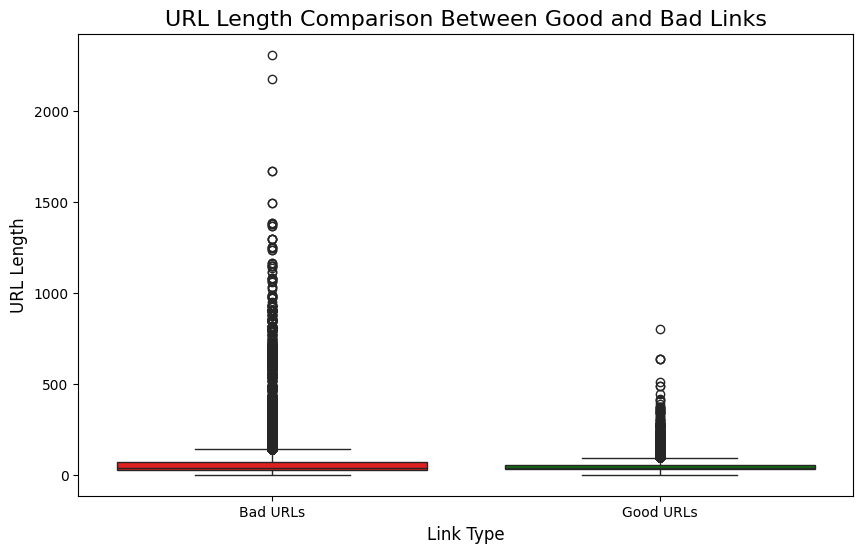

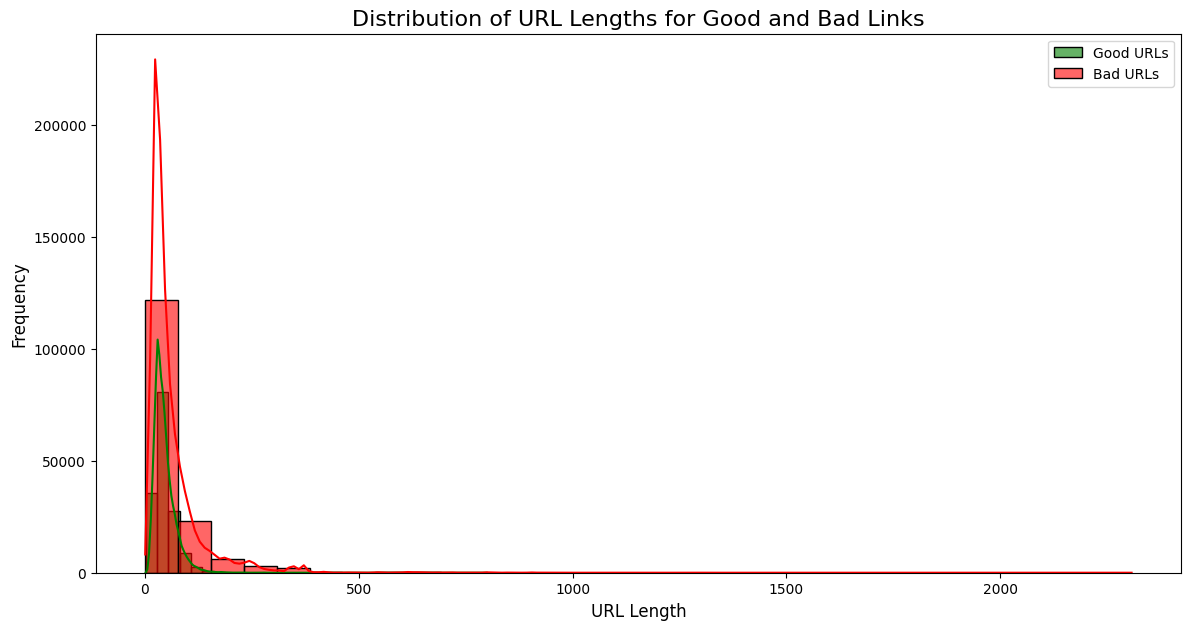

In [ ]:
# Calculate URL lengths
b_df['url_length'] = b_df['url'].apply(len)

# Split the data into good and bad URLs
good_urls_length = b_df[b_df['label'] == 'good']['url_length']
bad_urls_length = b_df[b_df['label'] == 'bad']['url_length']

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='url_length', data=b_df, palette=['red', 'green'])
plt.xticks([0, 1], ['Bad URLs', 'Good URLs'])
plt.title('URL Length Comparison Between Good and Bad Links', fontsize=16)
plt.xlabel('Link Type', fontsize=12)
plt.ylabel('URL Length', fontsize=12)
plt.show()

# Create histograms
plt.figure(figsize=(14, 7))
sns.histplot(good_urls_length, color='green', kde=True, label='Good URLs', bins=30, alpha=0.6)
sns.histplot(bad_urls_length, color='red', kde=True, label='Bad URLs', bins=30, alpha=0.6)
plt.title('Distribution of URL Lengths for Good and Bad Links', fontsize=16)
plt.xlabel('URL Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


# Step 3: Text Normalisation

Any NLP model starts with Text Normalisation. [Text normalization](https://spotintelligence.com/2023/01/25/text-normalization-techniques-nlp) is defined as cleaning and preprocessing text data to make it consistent and usable for different NLP tasks.


## Step 3.1 Tokenisation

[Tokenisation](https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-tokenization) is the process of splitting a corpus into its words or special characters.

The below code snippets tokenise the URL's into its words and special characters. In our case, we make use of the ``` RegexpTokenizer ``` function of the ntlk library. First, it checks the tokeniser works by tokenising the first URL. Then it adds the tokenised text to the DF (DataFrame). Finally, it displays a random sample of 5 rows of the DF.

In [ ]:
# Extract the tokens from URL's
tokeniser = RegexpTokenizer(r'[A-Za-z]+')

# Tokenise first URL
tokeniser.tokenize(b_df.url[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
# Tokenising all the URLs
print('Tokenising...')

# Apply the tokeniser to the 'URL' column and store results in 'tokenised_text'
b_df['tokenised_text'] = b_df['url'].map(lambda url: tokeniser.tokenize(url))

# Random Sample of 5 tokenised URL's
b_df.sample(5)

Tokenising...


,url,label,tokenised_text
514459,www.singaporeflyer.com/unique-experiences/sing...,bad,"[www, singaporeflyer, com, unique, experiences..."
539008,dickenshandchimes.com/jhg45s,bad,"[dickenshandchimes, com, jhg, s]"
61254,www.irt.org/articles/js193/index.htm,good,"[www, irt, org, articles, js, index, htm]"
532426,185.51.247.211/php/upload.php,bad,"[php, upload, php]"
23802,customer.service.secure.paypal.com.cgi.bin.web...,bad,"[customer, service, secure, paypal, com, cgi, ..."


## Step 3.2: Stemming

[Stemming](https://www.geeksforgeeks.org/introduction-to-stemming/) is the next step after tokenisation, which is defined as removing the affixes of the tokenised words. For this, we use the ```SnowballStemmer``` function of the ntlk library. We then add this stemmed text as another column to our DF

In [ ]:
# Initialize the stemmer for English
stemmer = SnowballStemmer("english")

# Stem all the words in ''
print('Stemming...')

# Apply the stemmer to each tokenized list in 'tokenized_text'
b_df['stemmed_text'] = b_df['tokenised_text'].map(lambda words: [stemmer.stem(word) for word in words])

# Random Sample of 5 stemmed URL's
b_df.sample(5)

Stemming...


,url,label,tokenised_text,stemmed_text
101374,brahaemy.ro/libraries/hero/hero/domain/login.php,bad,"[brahaemy, ro, libraries, hero, hero, domain, ...","[brahaemi, ro, librari, hero, hero, domain, lo..."
98791,fbicdubai.com/log/Confirmation/bank_info.php,bad,"[fbicdubai, com, log, Confirmation, bank, info...","[fbicdubai, com, log, confirm, bank, info, php]"
535751,xenlogiqtechsupport.com/components/com_formmak...,bad,"[xenlogiqtechsupport, com, components, com, fo...","[xenlogiqtechsupport, com, compon, com, formma..."
508128,hathanlittthet.ru/gate.php,bad,"[hathanlittthet, ru, gate, php]","[hathanlittthet, ru, gate, php]"
524694,joston2.xyz,bad,"[joston, xyz]","[joston, xyz]"


## Step 3.3: Joining

While joining the stemmed words is not an explicit step or rule when we make a NLP model, it makes vectorising the URL's easily in the earlier steps of modelling. Therefore, below is the code for joining the stemmed text.

In [ ]:
# Joining the stemmed words into a single string
print('Joining...')

# Join the list of stemmed words in 'stemmed_text' into a single string
b_df['joined_text'] = b_df['stemmed_text'].map(lambda words: ' '.join(words))

# Random Sample of 5 stemmed URL's
b_df.sample(5)

Joining...


,url,label,tokenised_text,stemmed_text,joined_text
451937,trueknowledge.com/q/facts_about__the_daydreamer,good,"[trueknowledge, com, q, facts, about, the, day...","[trueknowledg, com, q, fact, about, the, daydr...",trueknowledg com q fact about the daydream
298683,canadians.ca/more/profiles/d/d_colleen_dewhurs...,good,"[canadians, ca, more, profiles, d, d, colleen,...","[canadian, ca, more, profil, d, d, colleen, de...",canadian ca more profil d d colleen dewhurst htm
163329,data.greatbuildings.com/wiki/Lima%2C_Ohio,good,"[data, greatbuildings, com, wiki, Lima, C, Ohio]","[data, greatbuild, com, wiki, lima, c, ohio]",data greatbuild com wiki lima c ohio
60220,en.wikipedia.org/wiki/Computational_complexity...,good,"[en, wikipedia, org, wiki, Computational, comp...","[en, wikipedia, org, wiki, comput, complex, th...",en wikipedia org wiki comput complex theori
547035,youspeak.pt/liowrtxs,bad,"[youspeak, pt, liowrtxs]","[youspeak, pt, liowrtx]",youspeak pt liowrtx


# Step 4: Modelling

This is the last and final step of the AI Project Cycle. All the steps before modelling will aid in the process of modelling. [Modelling](https://www.hpe.com/ae/en/what-is/ai-models.html) is the process in which different models based on the visualized data can be created and even checked for the advantages and disadvantages of the model.

## Step 4.1 Splitting

[Splitting](https://cloud.google.com/vertex-ai/docs/tabular-data/data-splits) the model into training and testing data is a crucial process. Training data is the data used for finidng relationships in the data while testing data is used to evaluate the model. The Training-to-testing data ratio is 4:1.

The below code splits the training and testing data and visualises it with a pie chart

Training set size: 250275
Testing set size: 62569


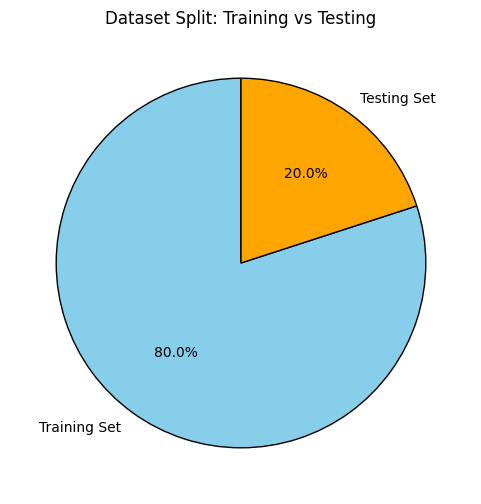

In [ ]:
# Split the dataset into features (X) and target labels (y)
X = b_df['joined_text']  # Feature column
y = b_df['label']  # Target column

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the resulting datasets
print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

# Pie chart sizes
sizes = [80, 20]  # Representing 80% training and 20% testing
labels = ['Training Set', 'Testing Set']
colors = ['skyblue', 'orange']

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Dataset Split: Training vs Testing')
plt.show()


## Step 4.2: Vectorisation

To prepare the URL data for model training, we employ TF-IDF Vectorization (Term Frequency-Inverse Document Frequency). This method converts textual data into numerical feature representations, allowing machine learning models to process the data effectively.

The following formula is used for TF-IDF:

$TFIDF(t,d)=TF(t,d)×IDF(t)$;

Where $TF(t,d)$ and $IDF(t)$ are calculated automatically.





In [ ]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the tokenized text
X_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Check the shape of the transformed feature matrix
print(X_tfidf.shape)

# Convert to a DataFrame to view the features (optional)
X_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(X_df.head())


(250275, 5000)
    aa  aaa  aab  aac  aad  aae  aaf  aaguaaqiaai  aandgtrad  aap  ...   zs  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0        0.0  0.0  ...  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0        0.0  0.0  ...  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0        0.0  0.0  ...  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0        0.0  0.0  ...  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0        0.0  0.0  ...  0.0   

    zt  ztipptop   zv   zw   zx  zxaze  zxhpa   zy   zz  
0  0.0       0.0  0.0  0.0  0.0    0.0    0.0  0.0  0.0  
1  0.0       0.0  0.0  0.0  0.0    0.0    0.0  0.0  0.0  
2  0.0       0.0  0.0  0.0  0.0    0.0    0.0  0.0  0.0  
3  0.0       0.0  0.0  0.0  0.0    0.0    0.0  0.0  0.0  
4  0.0       0.0  0.0  0.0  0.0    0.0    0.0  0.0  0.0  

[5 rows x 5000 columns]


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

The above output gives us the following facts:

1.  The matrix has a shape of (312844, 5000), which means it **contains 312,844 rows** (corresponding to the number of URLs in the dataset) and **5,000 columns** (corresponding to the most frequently occurring 5,000 words or tokens extracted from the URLs). These tokens were selected as features during the vectorization process.
2.  The values in the matrix are **mostly 0.0**, indicating that **most words do not appear in individual URLs**. This is typical for a sparse matrix, as URLs usually consist of a small subset of the overall vocabulary.
3.  Each value in the matrix represents the TF-IDF score of a word in a specific URL. A **0.0 value indicates the absence of a word** in that URL, **while non-zero values signify the importance of a word** in the context of that specific URL.

## Step 4.3: Training

[Training](https://www.oracle.com/ae/artificial-intelligence/ai-model-training) is the final major step of modelling before evaluation. In training, the model is fed the processed data and instructed to find patterns in the data so as to predict outcomes in the future.

Before we can directly feed the data into the model, we need to choose the right model for our use case. Thankfully, [Ahmed Mahmoud](https://www.kaggle.com/ahmedxmahmoud) has already uploaded a [notebook](https://www.kaggle.com/code/ahmedxmahmoud/phishing-url-detection) on Kaggle for comparing models for such a purpose, saving us time on what model to chose. They have used 5 models - namely Logistic Regression, KNN, Decision Tree, Random Forest, SVM. When we look at Accuracy, Precision, and Recall, we can see Logistic Regression performs well on all these evaluation metrics for classifying phishing links. Graphs and raw numbers cna be reffered to from their notebook.

The below code trains the model using LR (Logistic Regression)

In [ ]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## Step 4.4: Evaluation


[Evaluation](https://domino.ai/data-science-dictionary/model-evaluation) is the last and final step. Our modelling stage ends with this. Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses. Model evaluation is important to assess the efficacy of a model during initial research phases, and it also plays a role in model monitoring.

The following code calculates the four metrics of evaluation in addition to printing the [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix/).

The Metrics are calculated as:

1.  $\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$
2.  $\text{Precision} = \frac{TP}{TP + FP}$
3.  $\text{Recall} = \frac{TP}{TP + FN}$
4.  $\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

Accuracy: 0.9253
Classification Report:
              precision    recall  f1-score   support

         bad       0.95      0.90      0.92     31232
        good       0.91      0.95      0.93     31337

    accuracy                           0.93     62569
   macro avg       0.93      0.93      0.93     62569
weighted avg       0.93      0.93      0.93     62569



Text(70.72222222222221, 0.5, 'Reality')

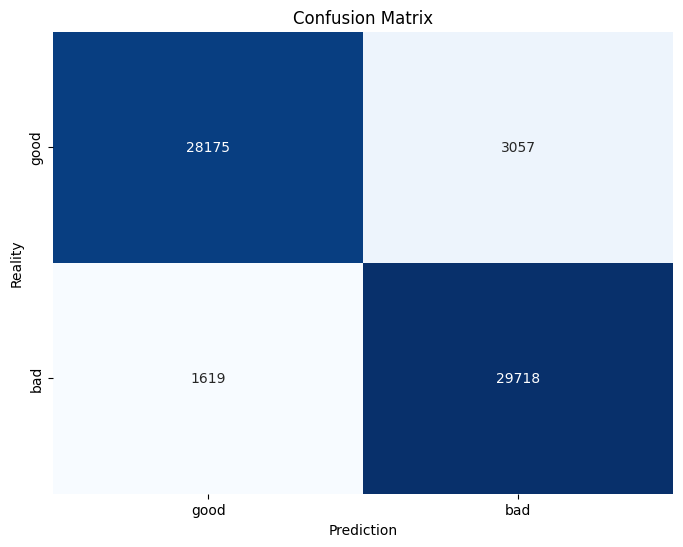

In [ ]:
# Make predictions on the entire dataset
y_pred = lr_model.predict(X_test_tfidf)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report for detailed metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['good', 'bad'], yticklabels=['good', 'bad'])

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Reality')


The following can be derived from the above numbers:

1.  The model achieves an **accuracy of 92.53%** (0.9253), indicating that it correctly predicts the label (either "bad" or "good") for approximately 92.53% of the total samples. This suggests that the model is generally performing well in distinguishing between phishing (bad) and safe (good) URLs.
2.  For the **bad class** (phishing URLs), the **precision is 0.95** (high precision), meaning the model is very accurate when it predicts a URL as bad. The **recall is 0.90**, meaning it successfully identifies 90% of the actual bad URLs.
3.  For the **good class** (safe URLs), the **precision is 0.91**, and **recall is 0.95**, indicating that the model does well in identifying safe URLs but with a slightly higher tendency to correctly capture more safe URLs compared to the bad ones.
4.  The **F1 score for both classes is close to 0.93** (for "bad" URLs, it's 0.92, and for "good" URLs, it's 0.93). This indicates a good balance between precision and recall, meaning the model is not biased toward one class and performs effectively across both. The f1-score is a crucial metric for imbalanced datasets, as it considers both false positives and false negatives.


## Step 4.5: Saving

Saving the model and vectoriser into a file makes it easier to share the trained model to other and also saves the hassle of retraining the model everytime. We also save the vectoriser for convenience.

We do this by applying the pickle library

In [ ]:
# Save the trained model to a file
with open('https://github.com/KrishKumarRajani/LinkGuardians/tree/6f7b33c96709e7ec7af7167abf179e12eabd016e/models/logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(lr_model, model_file)

# Save the vectorizer
with open('https://github.com/KrishKumarRajani/LinkGuardians/tree/6f7b33c96709e7ec7af7167abf179e12eabd016e/models/tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


## Step 4.6: Testing

Now let us test that the model actually works by just giving some links.

In [2]:
# Function to load pickle files from GitHub
def load_pickle(url):
    response = requests.get(url)
    response.raise_for_status()  # Raise an error if the download fails
    return pickle.load(BytesIO(response.content))

# Link for the model and vectorizer
model_link = 'https://github.com/KrishKumarRajani/LinkGuardians/raw/main/models/logistic_regression_model.pkl'
vectorizer_link = 'https://github.com/KrishKumarRajani/LinkGuardians/raw/main/models/tfidf_vectorizer.pkl'

# Load the model and vectorizer
model = load_pickle(model_link)
vectorizer = load_pickle(vectorizer_link)

print("Model and vectorizer loaded successfully!\n")

# List of URLs to predict
urls = [
    'yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php',
    'fazan-pacir.rs/temp/libraries/ipad',
    'tubemoviez.exe',
    'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt',
    'google.com',
    'google.com/search?q=hello',
    'youtube.com/',
    'youtube.com/watch?v=qI0TQJI3vdU',
    'retailhellunderground.com/',
    'restorevisioncenters.com/html/technology.html'
]

# Vectorise the URLs using the loaded vectorizer
urls_vectorised = vectorizer.transform(urls)

# Predict whether the URLs are phishing or not using the model
results = model.predict(urls_vectorised)

# Print results for the list of URLs
print("Predictions for all URLs:")
for url, result in zip(urls, results):
    label = "Bad (Phishing)" if result == 'bad' else "Good (Safe)"
    print(f"URL: {url} --> {label}")

print("\n--- Now check an individual URL ---\n")

# Function to predict an individual URL
def predict_url():
    # Take user input for a URL
    user_url = input("Enter a URL to check: ").strip()

    # Transform the input URL using the loaded vectorszer
    user_url_vectorised = vectorizer.transform([user_url])

    # Predict whether the URL is phishing or safe
    result = model.predict(user_url_vectorised)[0]

    # Interpret and print the result
    label = "Bad (Phishing)" if result == 'bad' else "Good (Safe)"
    print(f"The URL '{user_url}' is predicted as: {label}")

# Call the function
predict_url()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.5.2 when using version 1.6.0. This might lead to breaking c

Model and vectorizer loaded successfully!

Predictions for all URLs:
URL: yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php --> Bad (Phishing)
URL: fazan-pacir.rs/temp/libraries/ipad --> Bad (Phishing)
URL: tubemoviez.exe --> Bad (Phishing)
URL: svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt --> Bad (Phishing)
URL: google.com --> Good (Safe)
URL: google.com/search?q=hello --> Good (Safe)
URL: youtube.com/ --> Good (Safe)
URL: youtube.com/watch?v=qI0TQJI3vdU --> Good (Safe)
URL: retailhellunderground.com/ --> Good (Safe)
URL: restorevisioncenters.com/html/technology.html --> Good (Safe)

--- Now check an individual URL ---

Enter a URL to check: steamunlocked.exe
The URL 'steamunlocked.exe' is predicted as: Bad (Phishing)
